In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)

In [5]:
# Define FDR function
from statsmodels.sandbox.stats import multicomp as smi
def fdr_transf(mat,log10 = True):
    '''compute fdr of a given matrix'''
    
    row = mat.shape[0]
    col = mat.shape[1]
    flatt = mat.flatten()
    # replace 0's by 1
    flatt[flatt == 0] =1
    fdr_2d = smi.multipletests(flatt, alpha=0.05, method='fdr_bh')[1]
    if log10 == True:
        fdr_2d = [-np.log10(ii) for ii in fdr_2d] 
    fdr_3d = np.reshape(fdr_2d,(row,col))
    return fdr_3d

In [10]:
# Set path 
path_pheno = '/data/cisl/yassinebha/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/pheno/'
path_root = '/data/cisl/yassinebha/scratch_pin/pleio/pleio_association/'
# Set task-trial name dictionary
task_trial = {'gambling':['win','loss','contrast_win_vs_loss'], 
              'motor':['rh', 't', 'lf', 'lh', 'rf'],
              'relational':['relation', 'match','contrast_relation_vs_match'],
              'language':['story'],
              'wm':['2bk','0bk','contrast_2bk_vs_0bk'],
              'emotion':['contrast_fear_vs_neut'],
              'social':['mental','contrast_mental_vs_rnd']}


In [23]:
# Gather all p_values from 7 tasks
all_pval_0 =dict()
for ix_task, task in enumerate(task_trial.keys()):
    for ix_trial, trial in enumerate(task_trial[task]):
        if task == 'wm':
            path_pleio = os.path.join(path_root,'pleio_{}_{}_tmp2'.format('2019-07-23',task))
        else:
            path_pleio = os.path.join(path_root,'pleio_{}_{}_tmp2'.format('2019-07-24',task))
        all_results = np.load(os.path.join(path_pleio,'pleio_all_resuts.npy'),allow_pickle=True).item()
        all_pval_0.update({'{}'.format(trial):all_results[trial]['RhoG_pval_0']})
    

In [24]:
# calculate FDR for all 7 tasks
resul_ = pd.DataFrame(fdr_transf(np.concatenate([v for k,v in all_pval_0.items()], 1)),
                      columns= ['{}_{}'.format(task,trial)
                                for task in task_trial.keys()
                                for trial in task_trial[task]
                                for i in np.arange(15)])


In [25]:
# save FDR to csv file
for ix_task, task in enumerate(task_trial.keys()):
    for ix_trial, trial in enumerate(task_trial[task]):
        to_save_ = resul_.filter(regex='{}_{}'.format(task,trial), axis=1)
        if task == 'wm':
            path_pleio = os.path.join(path_root,'pleio_{}_{}_tmp2'.format('2019-07-23',task))
        else:
            path_pleio = os.path.join(path_root,'pleio_{}_{}_tmp2'.format('2019-07-24',task))
        to_save_.to_csv(os.path.join(path_pleio,'{}_FDR.csv'.format(trial)),index=False)

In [26]:
data = resul_.values

<AxesSubplot:>

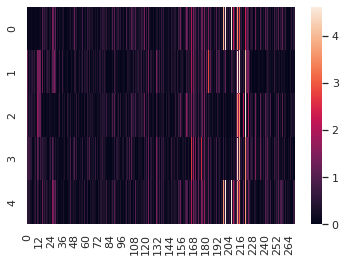

In [27]:
sns.heatmap(data)